In [12]:
import pandas as pd
import warnings
athlete_data = pd.read_csv('Encoded_Data.csv') 

In [13]:
athlete_data.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Event,Medal
0,1,24.0,180.0,80.0,4975,5141,1992,0,12977,3280,0
1,1,23.0,170.0,60.0,4975,5141,2012,0,22426,341,0
2,1,24.0,175.0,70.0,3424,3570,1920,0,4292,5733,0
3,1,34.0,175.0,70.0,6,3570,1900,0,7169,170,1
4,0,21.0,185.0,82.0,5718,5839,1988,1,2639,467,0


# Feature Selection

In [14]:
# Feature Selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [15]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

X = athlete_data.drop('Medal',axis=1)
Y = athlete_data[['Medal']]

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=40)

C:\Users\rmste\AppData\Local\Temp/ipykernel_12556/4064067306.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


Text(0.5, 0, 'Random Forest Feature Importance')

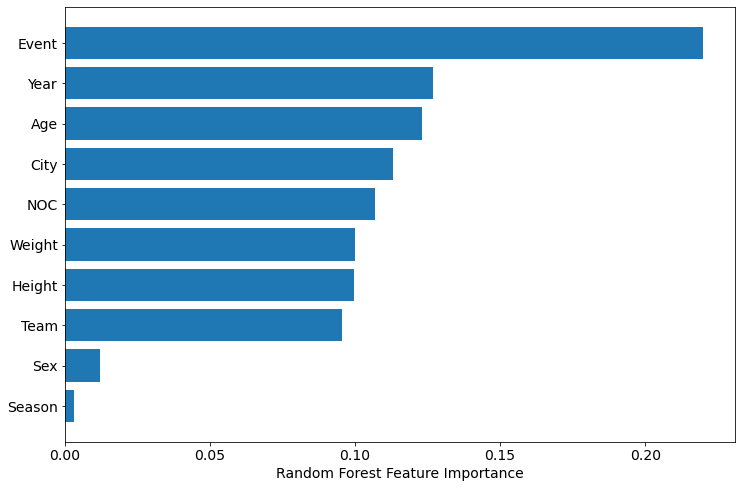

In [17]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, Y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

From the Feature importance graph we can see that columns "Sex" and "Season" has least importance so we can ovoid them.

In [18]:
X_train.drop(['Sex','Season'],axis=1,inplace=True)

C:\Users\rmste\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Scaling

In [19]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=pd.DataFrame(sc.fit_transform(X_train[['Age','Height','Weight','Team','NOC','Year','City','Event']]))
X_train.columns=['Age','Height','Weight','Team','NOC','Year','City','Event']
X_test=pd.DataFrame(sc.fit_transform(X_test[['Age','Height','Weight','Team','NOC','Year','City','Event']]))
X_test.columns=['Age','Height','Weight','Team','NOC','Year','City','Event']

In [20]:
X_train.head()

,Age,Height,Weight,Team,NOC,Year,City,Event
0,-1.032211,-0.027728,-0.041925,0.126779,0.025742,-2.421256,0.948796,-0.306844
1,-0.237809,-0.027728,-0.041925,1.282511,1.262441,-0.080003,-1.223527,0.347905
2,-0.873331,-2.181158,-1.713138,0.717071,0.673748,0.655820,-1.229725,-0.869291
3,0.079951,-1.104443,-1.076485,-1.173605,-1.217189,-0.347574,-0.321385,1.515931
4,0.238832,-0.027728,-0.041925,-0.230285,-0.269007,-0.481360,-1.223527,-0.033385


# Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

C:\Users\rmste\AppData\Local\Temp/ipykernel_12556/218825149.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


RandomForestClassifier()

In [23]:
y_pred = rf.predict(X_test)

In [24]:
cm=confusion_matrix(Y_test, y_pred)

Text(42.0, 0.5, 'Truth')

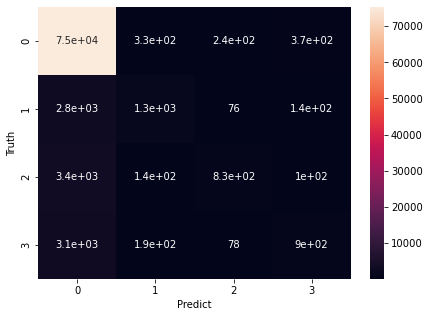

In [25]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Truth")

In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     76272
           1       0.67      0.30      0.42      4403
           2       0.68      0.18      0.29      4486
           3       0.59      0.21      0.31      4308

    accuracy                           0.88     89469
   macro avg       0.71      0.42      0.49     89469
weighted avg       0.85      0.88      0.85     89469



In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.8762923470699349